### Simulation

In [1]:
from bmc.simulate import simulate
import numpy as np
import matplotlib.pyplot as plt

In [2]:
low = -20e-6
high = 20e-6
n_iso = 1000
z_pos = np.linspace(low, high, n_iso)
z_pos = np.append(z_pos, 0)
z_pos = np.sort(z_pos)
# z_pos = np.random.permutation(z_pos)

In [3]:
# seq_path_gauss = 'seq_lib/10_ETM.seq'
seq_path_gauss = 'seq_lib/1_ETM_8ppm.seq'
# seq_path_gauss = 'seq_lib/STE.seq'
# seq_path_gauss = 'seq_lib/SE.seq'
config_path = 'sim_lib/config_1pool.yaml'

adc_time = 20e-3
retun_zmag = False
show_plot = False
n_backlog =  3 #'ALL'
webhook = False
plt_range = [0, 4]
iso_select = [-5,0,5]

In [4]:
sim = simulate(config_file=config_path, 
                   seq_file=seq_path_gauss, 
                   adc_time=adc_time,
                   z_positions=z_pos,
                   return_zmag=retun_zmag,
                   iso_select=iso_select,
                   show_plot=show_plot,
                   n_backlog=n_backlog,
                   webhook=webhook,
                   plt_range=plt_range)  # simulation mac

BMCTool simulation: 100%|██████████| 7/7 [00:13<00:00,  1.97s/it]

['gz at 0.0000s', 'rf at 0.0800s', 'gz at 0.0820s', 'adc at 0.0825s']


In [5]:
# sim.print_params()

/Users/danielmiksch/JupyterLab/optim/bmc/utils/eval.py:303: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


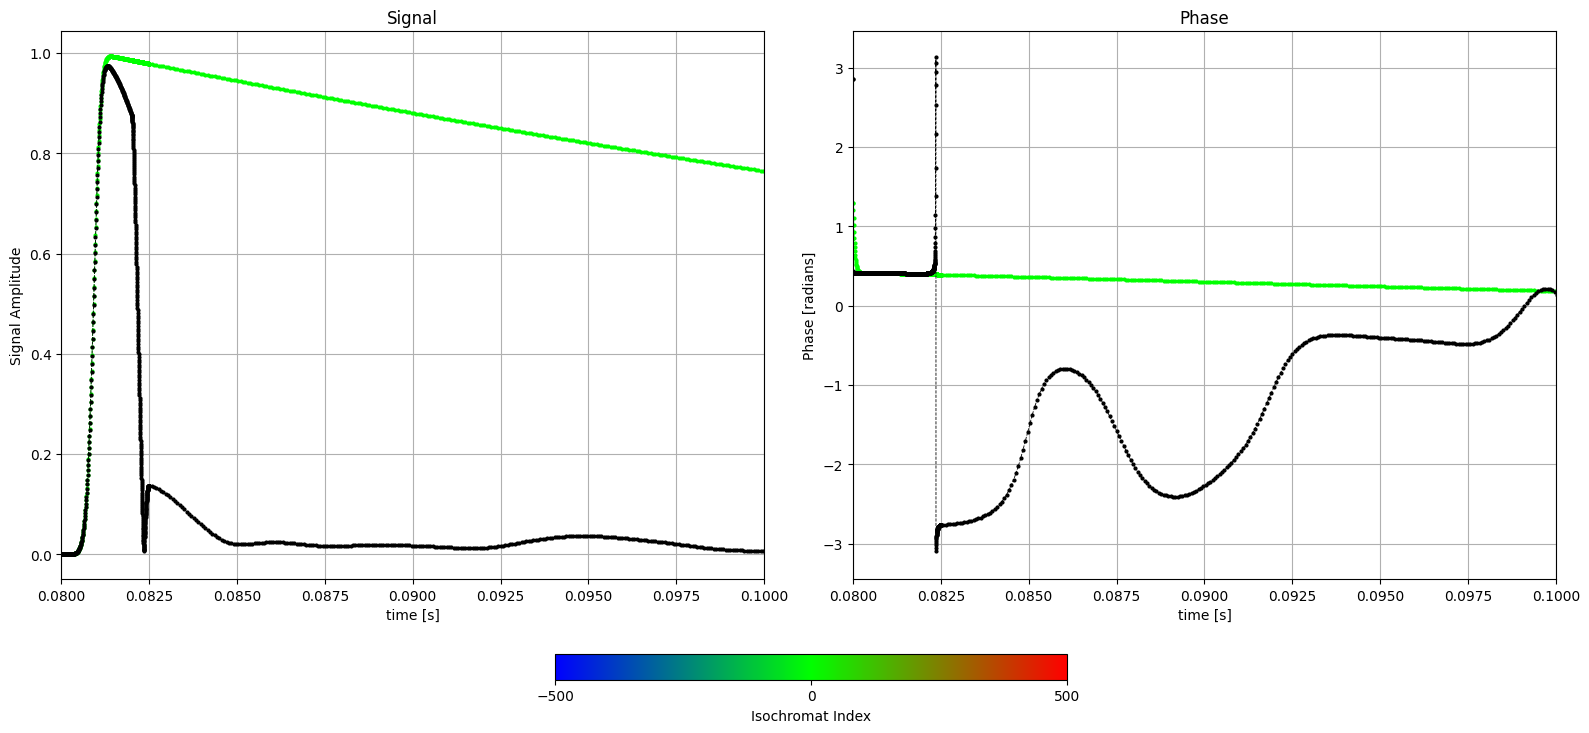

In [6]:
# %matplotlib widget
from bmc.utils.eval import plot_sim
time, m_z, m_z_total, m_c, m_c_total = sim.get_mag(return_cest_pool=False)

iso_select = [0]
plt_range = [0.0, 0.0353] #1ETM
# plt_range = [0.0675, 0.074] #5ETM
# plt_range = [0.1250, 0.141] #10ETM
# plt_range = [0.0675, 0.09]
# plt_range = [0.08, 0.1]
plt_range = [0.08, 0.1]

# _ = plot_sim(m_out=[m_z, m_z_total], time=time, plt_range=plt_range, iso_select=iso_select)
fig = plot_sim(m_out=[m_c, m_c_total], time=time, plt_range=plt_range, iso_select=iso_select)

m_trans_plus = np.abs(m_c_total)[-900:]
m_z_plus = m_z_total

# fig.savefig("/Users/danielmiksch/Downloads/STE_grad_signal.png", dpi=300, bbox_inches='tight')

### Animation

In [7]:
run_time = .1
track_path = False
ie = False
timing = False
total_mag = False
animate_cest = False
kwargs = {'quality': '-qh', 'write': '--write_to_movie'}  #--write_to_movie

In [8]:
# sim.animate(run_time=run_time, 
#             track_path=track_path, 
#             ie=ie, 
#             timing=timing,
#             total_mag=total_mag,
#             animate_cest=animate_cest,
#             **kwargs)

In [9]:
seq_path_gauss = 'seq_lib/1_ETM_8ppm_minus.seq'

In [10]:
sim_minus = simulate(config_file=config_path, 
                   seq_file=seq_path_gauss, 
                   adc_time=adc_time,
                   z_positions=z_pos,
                   return_zmag=retun_zmag,
                   iso_select=iso_select,
                   show_plot=show_plot,
                   n_backlog=n_backlog,
                   webhook=webhook,
                   plt_range=plt_range)  # simulation mac

BMCTool simulation: 100%|██████████| 7/7 [00:13<00:00,  1.97s/it]

['gz at 0.0000s', 'rf at 0.0800s', 'gz at 0.0820s', 'adc at 0.0825s']


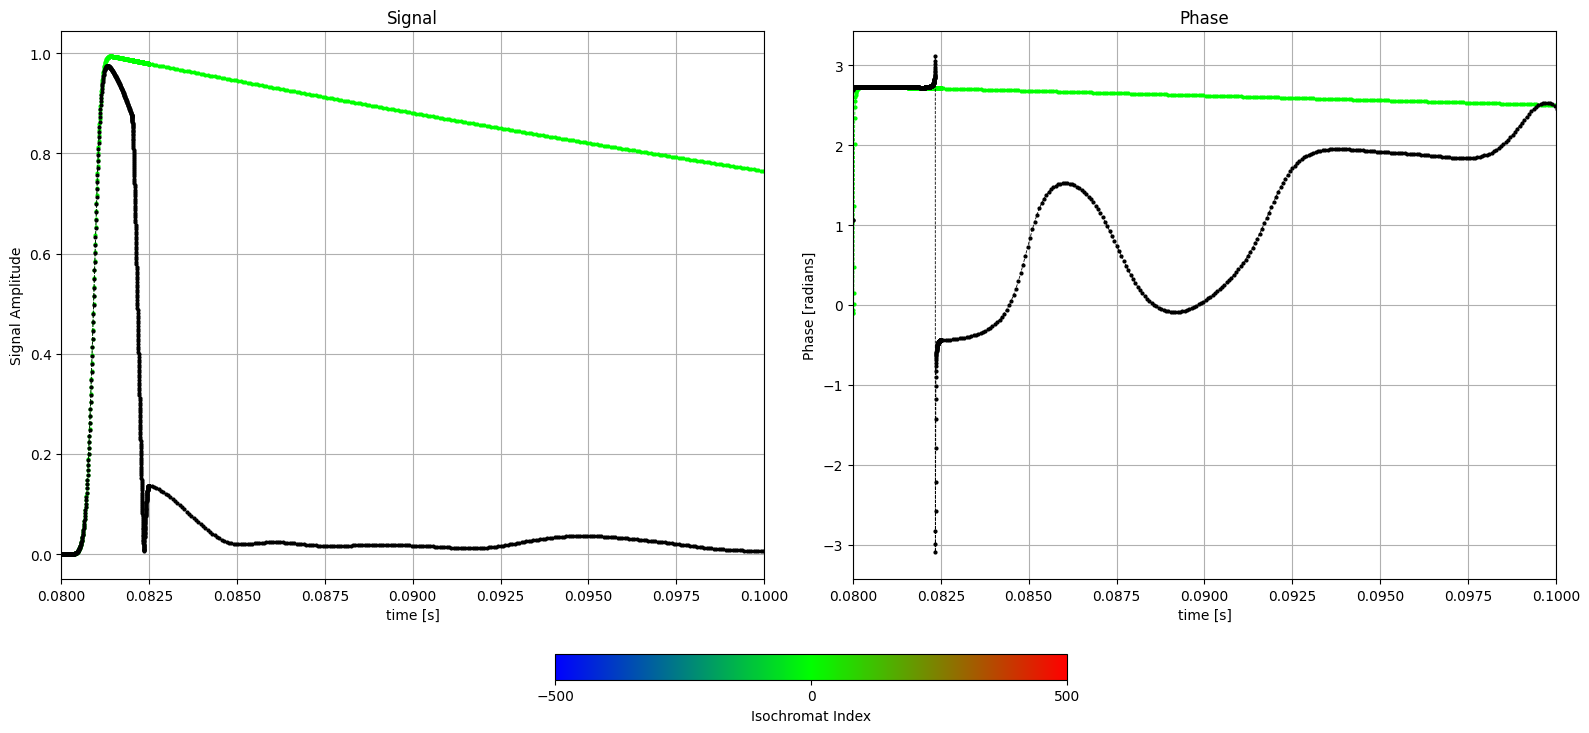

In [11]:
from bmc.utils.eval import plot_sim
time, m_z, m_z_total, m_c, m_c_total = sim_minus.get_mag(return_cest_pool=False)


iso_select = [0]
plt_range = [0.0, 0.0353] #1ETM
# plt_range = [0.0675, 0.074] #5ETM
# plt_range = [0.0286, 0.0360]
# plt_range = [0.0675, 0.09]
# plt_range = [0.8275, 1.048] #wex
# plt_range = [0.08, 0.11]
plt_range = [0.08, 0.1]


# _ = plot_sim(m_out=[m_z, m_z_total], time=time, plt_range=plt_range, iso_select=iso_select)
_ = plot_sim(m_out=[m_c, m_c_total], time=time, plt_range=plt_range, iso_select=iso_select)

m_trans_minus = np.abs(m_c_total)[-900:]

In [12]:
x_rf = np.arange(0, 2e-3, 2e-3/300)
x_spoil = np.arange(2e-3,2.5e-3, 0.5e-3/300) #0.5ms spoil
# x_spoil = np.arange(2e-3,3e-3, 1e-3/300) #1ms spoil
# x_adc = np.arange(2.5e-3, 5.5e-3, 3e-3/300) #3ms adc
x_adc = np.arange(2.5e-3, 22.5e-3, 20e-3/300) #200ms adc
# x_adc = np.arange(3e-3, 6e-3, 3e-3/300) #3ms adc


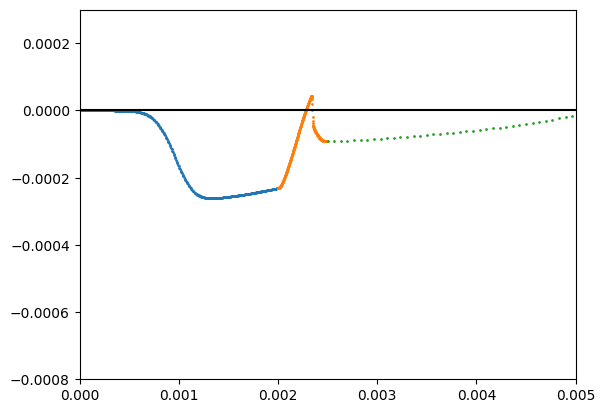

In [13]:
fig, ax = plt.subplots(dpi=100)
# plt.plot(x_spoil, (np.abs(m_trans_plus)-np.abs(m_trans_minus))[:300])
# plt.plot(x_adc, (np.abs(m_trans_plus)-np.abs(m_trans_minus))[300:])
plt.plot(x_rf,(m_trans_plus-m_trans_minus)[:300], 'o', markersize=1)
plt.plot(x_spoil,(m_trans_plus-m_trans_minus)[300:600], 'o', markersize=1)
plt.plot(x_adc,(m_trans_plus-m_trans_minus)[600:], 'o', markersize=1)
# plt.plot(x_rf,np.abs((m_trans_plus-m_trans_minus))[:300], 'o', markersize=1)
# plt.plot(x_spoil,np.abs((m_trans_plus-m_trans_minus))[300:600], 'o', markersize=1)
# plt.plot(x_adc,np.abs((m_trans_plus-m_trans_minus))[600:], 'o', markersize=1)
plt.axhline(0, c='black')
# plt.axhline(0.0055)
# plt.axvline(0.002476)

# plt.scatter(0.002476, 0.0055, c='b')

# plt.axhline(0.0295, color='r')
# plt.axvline(0.0025, color='r')

# plt.scatter(0.0025, 0.0295, c='r')

# plt.axhline(0.0006, color='g')
# plt.axvline(0.002482, color='g')

# plt.scatter(0.002475, 0.00026, c='g')

# plt.axvline(0.0055, color='purple')
# plt.axvline(0.002485, color='purple')
# plt.scatter(0.002497, 0.000136, c='purple')

# plt.plot(x_rf,m_trans_plus[:300], 'o', markersize=1, c='b')
# plt.plot(x_spoil,m_trans_plus[300:600], 'o', markersize=1, c='b')
# plt.plot(x_adc,m_trans_plus[600:], 'o', markersize=1, c='b')

# plt.plot(x_rf,m_trans_minus[:300], 'o', markersize=1, c='r')
# plt.plot(x_spoil,m_trans_minus[300:600], 'o', markersize=1, c='r')
# plt.plot(x_adc,m_trans_minus[600:], 'o', markersize=1, c='r')

# plt.axvline(0.00241)

plt.xlim(0.00, 0.005)
# plt.xlim(0.002, 0.006)
# plt.xlim(0.002, 0.006)
# plt.ylim(-0.0002, 0.00032)
plt.ylim(-0.0008, 0.0003)
resulst = (m_trans_plus-m_trans_minus)
plt.show()

# fig.savefig("/Users/danielmiksch/Downloads/racete_02ppm.png", dpi=300, bbox_inches='tight')

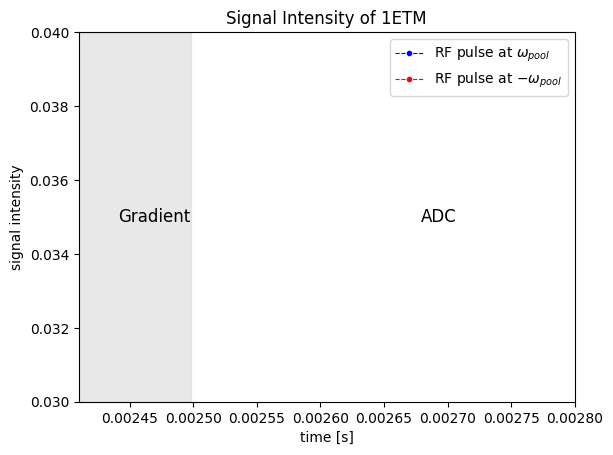

In [14]:

fig, ax = plt.subplots(dpi=100)

# Plots für m_trans_plus
ax.plot(x_rf, m_trans_plus[:300], '--o', markersize=3, c='b', linewidth=0.8)
ax.plot(x_spoil, m_trans_plus[300:600], '--o', markersize=3, c='b', linewidth=0.8)
ax.plot(x_adc, m_trans_plus[600:], '--o', markersize=3, c='b', linewidth=0.8,
        label=r'RF pulse at $\omega_{pool}$')

# Plots für m_trans_minus
ax.plot(x_rf, m_trans_minus[:300], '--o', markersize=3, c='r', linewidth=0.8)
ax.plot(x_spoil, m_trans_minus[300:600], '--o', markersize=3, c='r', linewidth=0.8,
        label=r'RF pulse at $-\omega_{pool}$')
ax.plot(x_adc, m_trans_minus[600:], '--o', markersize=3, c='r', linewidth=0.8)

# Färbe den Bereich bis zum letzten x-Wert des Segments [300:600] über die gesamte y-Achse ein:
x_left = x_spoil[0]
x_right = x_spoil[-1]

ax.axvspan(x_left, x_right, color='lightgray', alpha=0.5)

# Platziere einen Text in der linken Hälfte des Plots:
ax.text(0.08, 0.5, 'Gradient', transform=ax.transAxes,
        fontsize=12, color='black', verticalalignment='center')
ax.text(0.69, 0.5, 'ADC', transform=ax.transAxes,
        fontsize=12, color='black', verticalalignment='center')

# Achsenbeschriftungen, Titel, Legende und Limits:
ax.set_title('Signal Intensity of 1ETM')
ax.set_ylabel('signal intensity')
ax.set_xlabel('time [s]')
ax.legend()

# plt.axvline(0.00241)
plt.xlim(0.00241, 0.0028)
ax.set_ylim(0.03, 0.04)

plt.show()

# fig.savefig("/Users/danielmiksch/Downloads/racete_on_off.png", dpi=300, bbox_inches='tight')

In [15]:
from bmc.utils.tex_variation import run_variation, _run_variation

# seq_on = ['seq_lib/10_ETM.seq']
# seq_off = ['seq_lib/10_ETM_minus.seq']


# _, signal_ten_ETM = run_variation(seq_on,
#                              seq_off,
#                              config_path,
#                              adc_time,
#                              z_pos,
#                              webhook,
#                              num_points = 1,
#                              batch_size=1,
#                              max_processes=1,
#                              save_to_file=False,
#                              show_plot=False)


In [16]:
# from bmc.utils.tex_variation import _run_variation
# import numpy as np
# import matplotlib.pyplot as plt

# seq_on = 'seq_lib/10_ETM.seq'
# seq_off = 'seq_lib/10_ETM_minus.seq'
# config_path = 'sim_lib/config_1pool.yaml'

# adc_time = 20e-3
# webhook = False

# low = -20e-6
# high = 20e-6 
# z_pos = [np.sort(np.append(np.linspace(low, high, n_iso), 0)) for n_iso in  range(1000, 12501, 2500)]

# for i in z_pos:
#     print(f'n_iso: {len(i)}')
#     _, _ = _run_variation(seq_on, seq_off, config_path, adc_time, i, webhook, show_plot=True)

In [17]:
# from bmc.utils.tex_variation import run_variation_parallel
# import numpy as np
# import matplotlib.pyplot as plt

# seq_on = 'seq_lib/10_ETM.seq'
# seq_off = 'seq_lib/10_ETM_minus.seq'
# config_path = 'sim_lib/config_1pool.yaml'

# adc_time = 20e-3
# webhook = False

# low = -20e-6
# high = 20e-6 
# n_iso = 1000
# z_pos = np.linspace(low, high, n_iso)
# z_pos = np.append(z_pos, 0)
# z_pos = np.sort(z_pos)

# print(f'n_iso: {len(z_pos)}')
# _, singal = run_variation_parallel(seq_on, seq_off, config_path, adc_time, z_pos, webhook, show_plot=True)
# print(singal)

In [18]:
#%matplotlib widget

# signal = np.array([
#     0.00023167788178419377,
#     0.0002297266899141397,
#     0.00022948618449500767,
#     0.00022936622278253106,
#     0.0002293063150708914,
#     0.0002292863566983889,
#     0.00022927637954946146,
#     0.00022926640375965323,
#     0.00022925842411050505,
#     0.00022925124317114663
# ])

# n_iso = np.array([
#     101,
#     501,
#     1001,
#     2001,
#     4001,
#     6001,
#     8001,
#     12001,
#     20001,
#     50001
# ])

# fig, ax = plt.subplots(dpi=100)

# plt.plot(n_iso, signal, '--o', c='blue', linewidth=1, markersize=5, label=r'$\Delta\omega = 0$')
# # plt.xscale('log')
# ax.set_ylabel('signal intensity')
# ax.set_xlabel('Number of Isochromats')
# ax.legend()

# plt.savefig("results/signal_plot_iso.png", dpi=300, bbox_inches='tight')

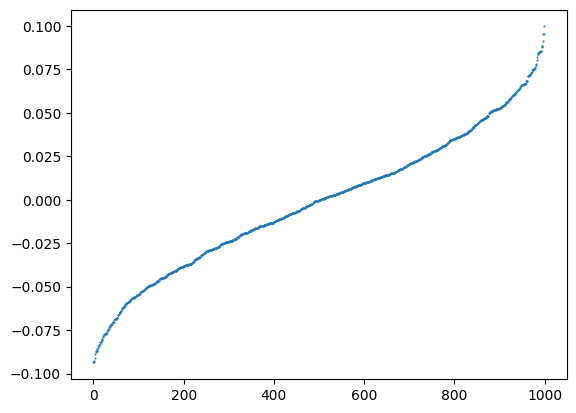

In [19]:
  # Zentralwert der Verteilung
np.random.seed(42)
# Wertebereich definieren
sigma = 0.1
O1 = 0
v = np.linspace(-0.1, .1, 1000)
ln2 = np.log(2)
f_v = (2 / sigma) * np.sqrt(ln2 / np.pi) * np.exp(-4 * ln2 * ((v - O1)**2) / sigma**2)
f_v /= np.trapz(f_v, v)
num_samples = 1000 
samples = np.random.choice(v, size=num_samples, p=f_v / f_v.sum())

plt.plot(np.sort(samples), 'o', label='Gauss-Verteilung', markersize=.5)

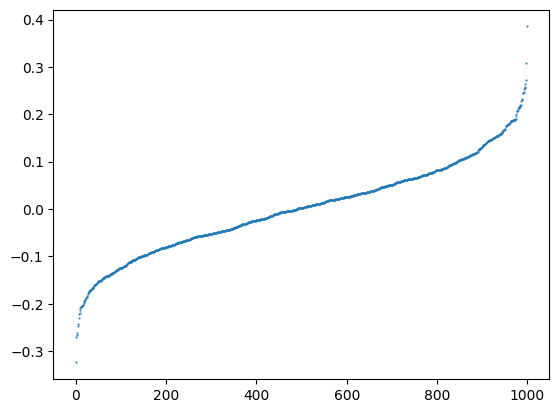

In [20]:
np.random.seed(42)
test = np.sort(np.random.normal(0, 0.1, 1000))
plt.plot(test, 'o', label='Gauss-Verteilung', markersize=.5)

In [21]:
np.random.seed(42)
test = np.sort(np.random.normal(0, 0.1, 5))
test

array([-0.02341534, -0.01382643,  0.04967142,  0.06476885,  0.15230299])

In [22]:
np.random.seed(42)
test = np.sort(np.random.normal(0, 0.1, 6))
test

array([-0.02341534, -0.0234137 , -0.01382643,  0.04967142,  0.06476885,
        0.15230299])